<a href="https://colab.research.google.com/github/Raidin/HowDoDeepLearning/blob/remind_basic_skill/Activation_Function_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activation Function Summary**
---
> Activation Function(활성화 함수)는 Neural Network의 입력신호를 출력 신호롸 변환하는 함수이다. 활성화 함수는 대개 비선형함수(non-linear function)을 사용하며, 자주 사용되는 함수는 아래와 같다.
* Sigmoid
* Hyperbolic Tangent
* Relu
* Leaky Relu
* PRelu
* ELU

In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [0]:
def EachFunctinGraph(*args) :
    plt.figure(figsize=(8, 8))

    plt.plot(x, args[1], label=args[0], linewidth='1.0', linestyle="-")

    plt.grid(True)
    plt.title(args[0])
    plt.legend(loc='upper left')

    '''
    Equation Display
    '''
    plt.text(0.2, 0.2, args[2], fontsize=15)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.show()


In [0]:
def MergeFunctionGraph(**kwarg):
    plt.figure(figsize=(8, 8))

    for key, value in kwarg.items():
        plt.plot(x, value, label=key, linewidth='1.0', linestyle="-")

    plt.grid(True)
    plt.title('Activation Function')
    plt.legend(loc='upper left')

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.show()


### 1. Sigmoid
---
> Sigmoid 함수는 로지스틱 함수로도 불리며 [0 : 1]의 출력 값의 범위를 가지고 입력값이 크면 1, 작으면 0에 수렴 되는 특징을 가진다. 



In [0]:
def Sigmoid(x):
    # Sigmoid = lambda x: 1 / (1 + np.exp(-x))
    return 1 / (1 + np.exp(-x))


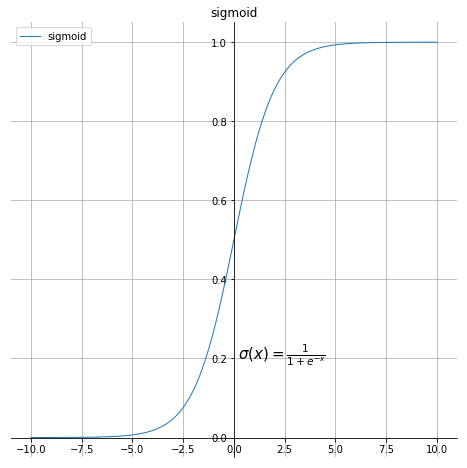

In [52]:
x = np.linspace(-10, 10, 256, endpoint=True)
eq = r'$\sigma(x)=\frac{1}{1+e^{-x}}$'
activation = Sigmoid(x)
EachFunctinGraph('sigmoid', activation, eq);

In [0]:
def HyperbolicTangent(x):
    # return 2 / (1 + np.exp(-2 * x)) - 1
    return 2 * Sigmoid(2 * x) -1

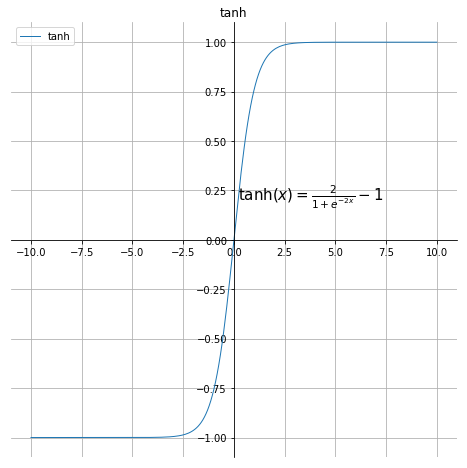

In [63]:
x = np.linspace(-10, 10, 256, endpoint=True)
eq = r'$\tanh (x)=\frac{2}{1+e^{-2 x}}-1$'
activation = HyperbolicTangent(x)
EachFunctinGraph('tanh', activation, eq);

In [0]:
def Relu(x):
    return np.maximum(x, 0)

In [0]:
def LeakyRelu(x):
    return np.maximum(x * 0.01, x)

In [0]:
def PRelu(x):
    alpha = 2
    return np.maximum(x * alpha, x)

In [0]:
def ELU(x):
    alpha = 2
    return np.maximum(0, x) + np.minimum(0, alpha * (np.exp(x) - 1))

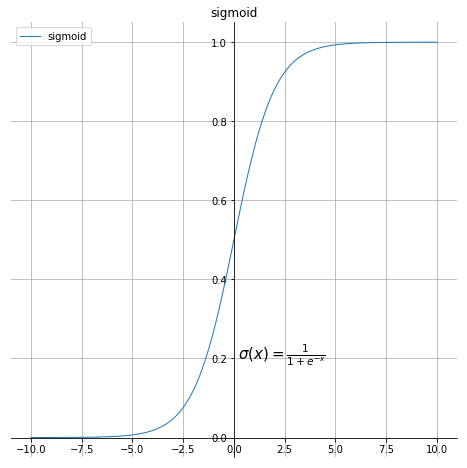

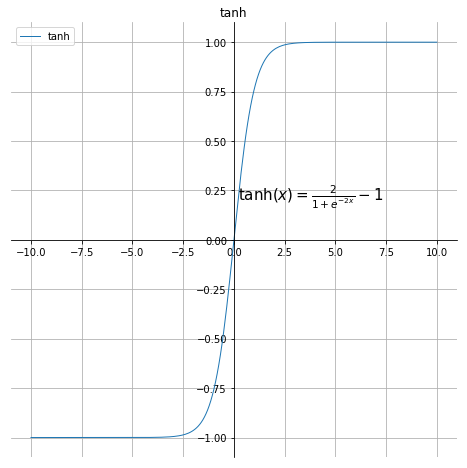

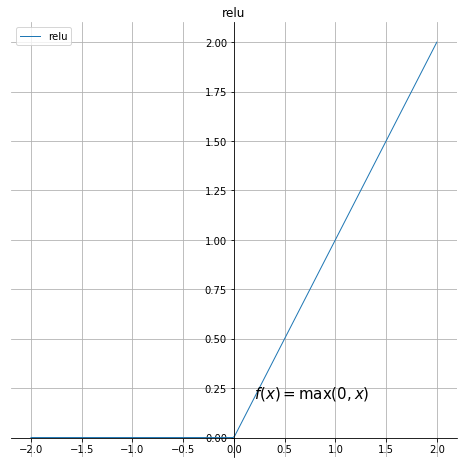

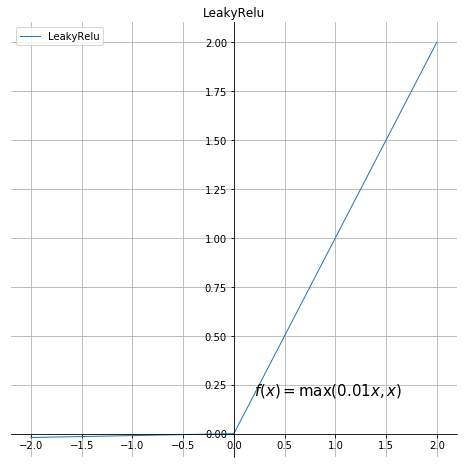

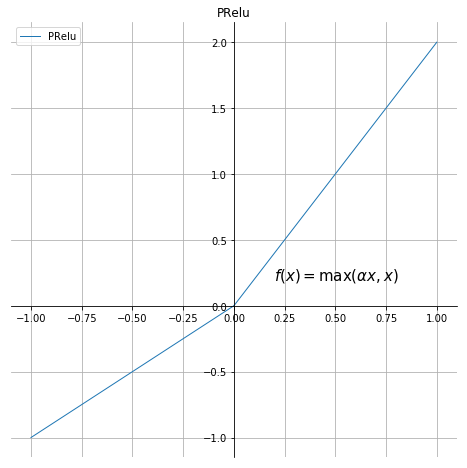

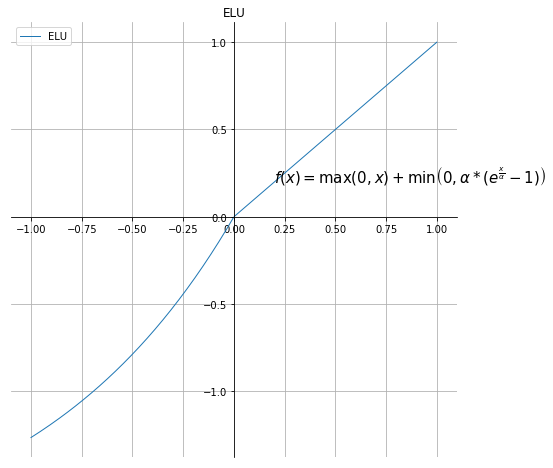

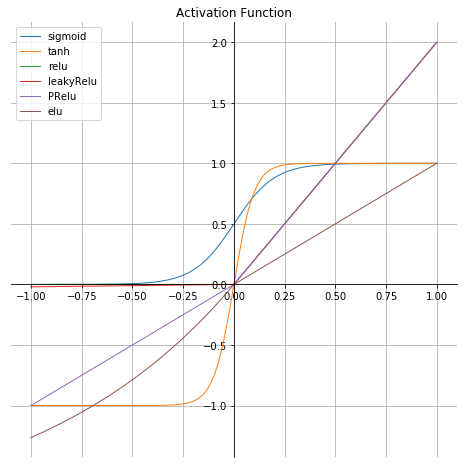

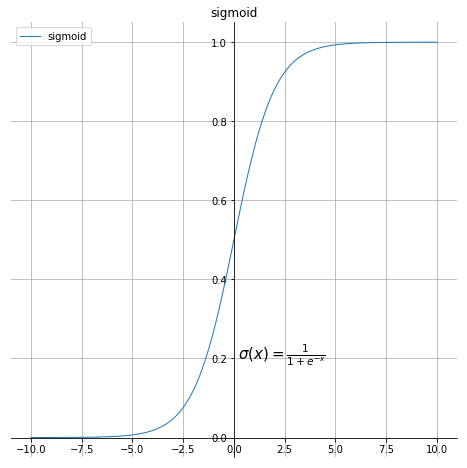

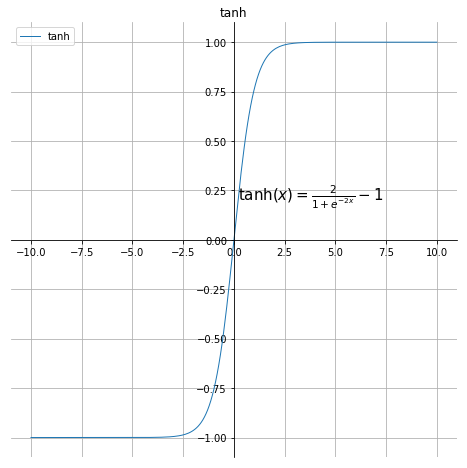

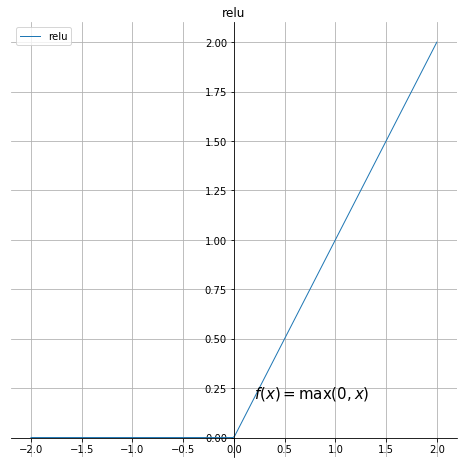

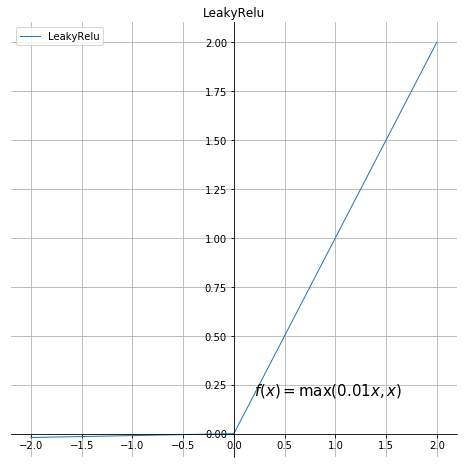

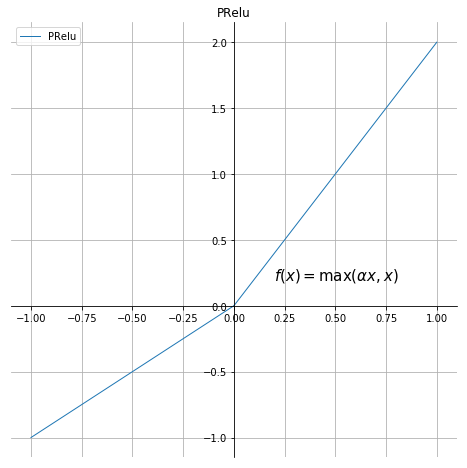

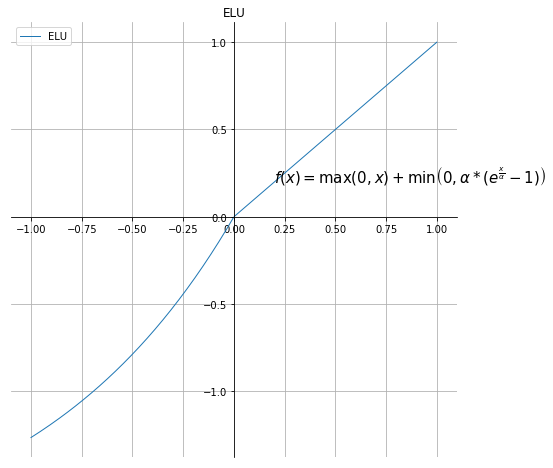

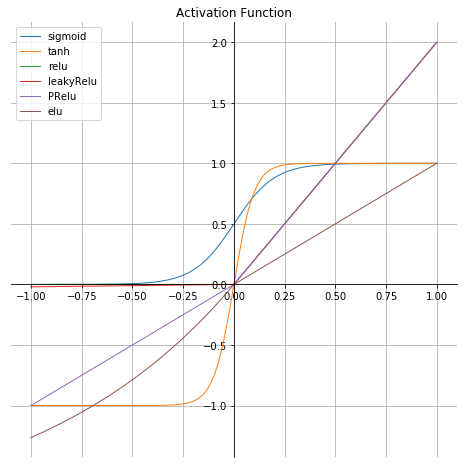

In [58]:
if __name__ == '__main__':
    x = np.linspace(-10, 10, 256, endpoint=True)

    '''
    latex equation
    '''
    sigmoid_eq =  r'$\sigma(x)=\frac{1}{1+e^{-x}}$'
    tanh_eq =  r'$\tanh (x)=\frac{2}{1+e^{-2 x}}-1$'
    relu_eq = r'$f(x)=\max (0, x)$'
    leaky_relu_ep = r'$f(x)=\max (0.01 x, x)$'
    prelu_eq = r'$f(x)=\max (\alpha x, x)$'
    elu_eq = r'$f(x)=\max (0, x)+\min \left(0, \alpha *\left(e^{\frac{x}{\alpha}}-1\right)\right)$'

    sigmoid = Sigmoid(x)
    EachFunctinGraph('sigmoid', sigmoid, sigmoid_eq);

    tanh = HyperbolicTangent(x)
    EachFunctinGraph('tanh', tanh, tanh_eq);

    x = np.linspace(-2, 2, 256, endpoint=True)
    relu = Relu(x)
    EachFunctinGraph('relu', relu, relu_eq);

    leaky_relu = LeakyRelu(x)
    EachFunctinGraph('LeakyRelu', leaky_relu, leaky_relu_ep);

    x = np.linspace(-1, 1, 256, endpoint=True)
    p_relu = PRelu(x)
    EachFunctinGraph('PRelu', p_relu, prelu_eq);

    elu = ELU(x)
    EachFunctinGraph('ELU', elu, elu_eq);

    '''
    Overall Activation Function Visualization
    '''
    MergeFunctionGraph(sigmoid=sigmoid, tanh=tanh, relu=relu, leakyRelu=leaky_relu, PRelu=p_relu, elu=elu)
    